In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
	# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 123s 2ms/step - loss: 0.5939 - acc: 0.8136 - val_loss: 0.1425 - val_acc: 0.9547


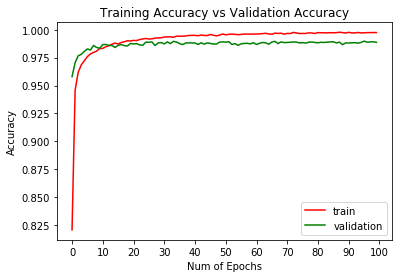

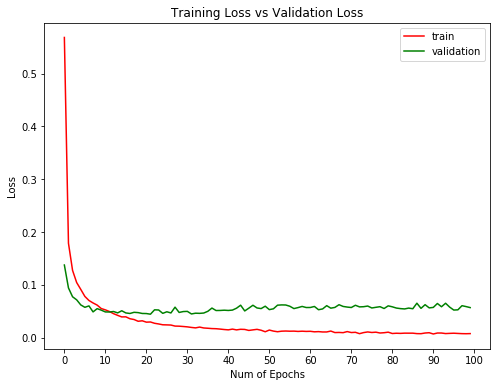

In [66]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [67]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.87%


0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009
[[ 964    1    3    0    1    0    4    5    0    2]
 [   1 1131    0    1    0    0    0    2    0    0]
 [   2    1 1011    7    1    0    1    8    1    0]
 [   0    0    1 1004    0    4    0    1    0    0]
 [   0    0    0    0  975    0    1    0    0    6]
 [   1    0    0    6    0  883    1    1    0    0]
 [   2    3    0    1    2    3  946    0    1    0]
 [   0    4    4    1    0    1    0 1014    2    2]
 [   1    0    0    3    0    2    0    0  964    4]
 [   1    1    0    0    6    4    0    1    1  995]]


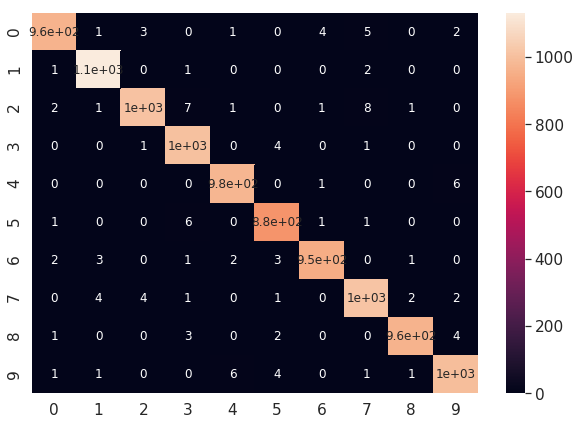

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 13, 13)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 11, 11)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 5, 5)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 3, 3)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 1, 1)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 1, 1)          0         
__________

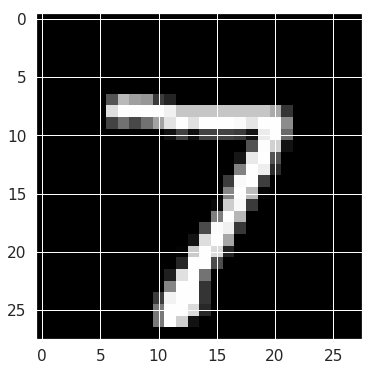

In [73]:
imageToUse = X_test[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")